# Get the data

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-20 07:50:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  81.0MB/s    in 1.3s    

2021-06-20 07:50:30 (81.0 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

In [3]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [4]:
import os

# Walk through pizza_steak directory
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 1 images in 'pizza_steak'
There are 2 directories and 1 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 1 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


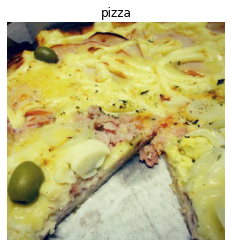

In [8]:
# View random image
img = view_random_image(target_class="pizza", target_dir="pizza_steak/train/")

In [9]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  0,   0,  23],
        [  0,   0,  24],
        [  0,   0,  23],
        ...,
        [ 89,  53,  21],
        [ 82,  45,  16],
        [102,  63,  34]],

       [[  1,   1,  25],
        [  1,   1,  25],
        [  0,   0,  19],
        ...,
        [101,  65,  31],
        [ 98,  59,  28],
        [105,  66,  35]],

       [[  0,   0,  20],
        [  0,   1,  22],
        [  2,   0,  21],
        ...,
        [112,  72,  37],
        [111,  71,  36],
        [106,  63,  31]],

       ...,

       [[160, 157, 114],
        [165, 162, 119],
        [172, 169, 126],
        ...,
        [122, 120,  43],
        [121, 119,  42],
        [120, 118,  41]],

       [[159, 156, 113],
        [165, 162, 119],
        [172, 169, 126],
        ...,
        [124, 122,  45],
        [122, 120,  43],
        [120, 118,  43]],

       [[157, 154, 111],
        [162, 159, 116],
        [169, 166, 123],
        ...,
        [125, 123,  4

In [10]:
img.shape # returns width, height, color channels

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.        , 0.        , 0.09019608],
        [0.        , 0.        , 0.09411765],
        [0.        , 0.        , 0.09019608],
        ...,
        [0.34901961, 0.20784314, 0.08235294],
        [0.32156863, 0.17647059, 0.0627451 ],
        [0.4       , 0.24705882, 0.13333333]],

       [[0.00392157, 0.00392157, 0.09803922],
        [0.00392157, 0.00392157, 0.09803922],
        [0.        , 0.        , 0.0745098 ],
        ...,
        [0.39607843, 0.25490196, 0.12156863],
        [0.38431373, 0.23137255, 0.10980392],
        [0.41176471, 0.25882353, 0.1372549 ]],

       [[0.        , 0.        , 0.07843137],
        [0.        , 0.00392157, 0.08627451],
        [0.00784314, 0.        , 0.08235294],
        ...,
        [0.43921569, 0.28235294, 0.14509804],
        [0.43529412, 0.27843137, 0.14117647],
        [0.41568627, 0.24705882, 0.12156863]],

       ...,

       [[0.62745098, 0.61568627, 0.44705882],
        [0.64705882, 0.63529412, 0.46666667],
        [0.6745098 , 0

## An End to End Example

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from dirs and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=(["accuracy"]))

history_1 = model_1.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 41s 198ms/step - loss: 0.5456 - accuracy: 0.7280 - val_loss: 0.3829 - val_accuracy: 0.8280
Epoch 2/10
47/47 [==============================] - 9s 182ms/step - loss: 0.4104 - accuracy: 0.8180 - val_loss: 0.3983 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 9s 187ms/step - loss: 0.3938 - accuracy: 0.8327 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 4/10
47/47 [==============================] - 9s 185ms/step - loss: 0.3514 - accuracy: 0.8440 - val_loss: 0.3251 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 9s 184ms/step - loss: 0.3238 - accuracy: 0.8613 - val_loss: 0.3450 - val_accuracy: 0.8360
Epoch 6/10
47/47 [==============================] - 9s 185ms/step - loss: 0.2831 - accuracy: 0.8880 - val_loss: 0.3040 - val_accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 9s 188ms/ste

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

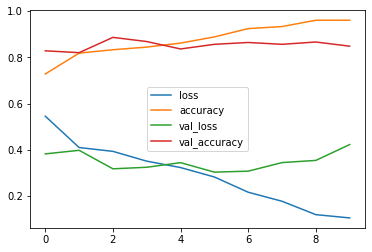

In [14]:
pd.DataFrame(history_1.history).plot()

## Using the same model as before

In [15]:
# Get random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 177ms/step - loss: 4.6154 - accuracy: 0.6113 - val_loss: 1.9850 - val_accuracy: 0.6800
Epoch 2/10
47/47 [==============================] - 8s 168ms/step - loss: 1.2910 - accuracy: 0.7033 - val_loss: 1.5581 - val_accuracy: 0.6080
Epoch 3/10
47/47 [==============================] - 8s 169ms/step - loss: 1.0395 - accuracy: 0.7040 - val_loss: 1.3998 - val_accuracy: 0.5980
Epoch 4/10
47/47 [==============================] - 8s 171ms/step - loss: 0.6198 - accuracy: 0.7593 - val_loss: 0.4504 - val_accuracy: 0.7980
Epoch 5/10
47/47 [==============================] - 8s 173ms/step - loss: 0.4641 - accuracy: 0.7987 - val_loss: 1.2234 - val_accuracy: 0.5420
Epoch 6/10
47/47 [==============================] - 8s 170ms/step - loss: 0.4997 - accuracy: 0.7780 - val_loss: 0.4573 - val_accuracy: 0.7740
Epoch 7/10
47/47 [==============================] - 8s 167ms/step - loss: 0.4627 - accuracy: 0.7893 - val_loss: 0.4510 - val_accuracy: 0.7880
Epoch 

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


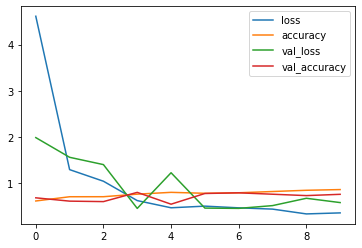

In [17]:
pd.DataFrame(history_2.history).plot()

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/10
47/47 [==============================] - 9s 176ms/step - loss: 3.7389 - accuracy: 0.6107 - val_loss: 1.3291 - val_accuracy: 0.7320
Epoch 2/10
47/47 [==============================] - 8s 174ms/step - loss: 0.8606 - accuracy: 0.7240 - val_loss: 0.4607 - val_accuracy: 0.7820
Epoch 3/10
47/47 [==============================] - 8s 170ms/step - loss: 0.6089 - accuracy: 0.7507 - val_loss: 0.5321 - val_accuracy: 0.7500
Epoch 4/10
47/47 [==============================] - 8s 169ms/step - loss: 0.5271 - accuracy: 0.7653 - val_loss: 0.5678 - val_accuracy: 0.7700
Epoch 5/10
47/47 [==============================] - 8s 170ms/step - loss: 0.6529 - accuracy: 0.7320 - val_loss: 0.5359 - val_accuracy: 0.7860
Epoch 6/10
47/47 [==============================] - 8s 171ms/step - loss: 0.4778 - accuracy: 0.8087 - val_loss: 0.4275 - val_accuracy: 0.7920
Epoch 7/10
47/47 [==============================] - 8s 169ms/step - loss: 0.4224 - accuracy: 0.8240 - val_loss: 0.6091 - val_accuracy: 0.7540
Epoch 

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


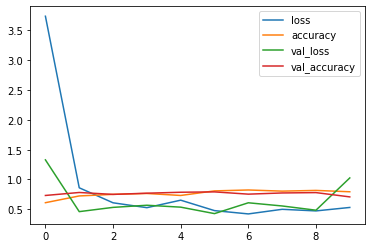

In [20]:
pd.DataFrame(history_3.history).plot()

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Break Down

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


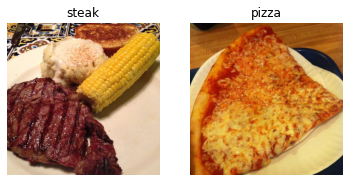

In [22]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocessing the data

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [24]:
# Turn data into batches

# Craete train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in out image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory if images
                                               target_size=(224, 224), # Target size of images (H, W)
                                               class_mode="binary", # Type of the data
                                               batch_size=32) # Size of the mini batches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the nect batch of data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.57254905, 0.5058824 , 0.4431373 ],
          [0.54509807, 0.37254903, 0.32156864],
          [0.61960787, 0.3921569 , 0.3137255 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 0.9921569 , 0.9921569 ],
          [1.        , 0.9921569 , 1.        ]],
 
         [[0.4666667 , 0.35686275, 0.3019608 ],
          [0.4666667 , 0.3372549 , 0.27058825],
          [0.54901963, 0.34509805, 0.25882354],
          ...,
          [1.        , 1.        , 0.9921569 ],
          [1.        , 1.        , 0.9921569 ],
          [0.9843138 , 1.        , 1.        ]],
 
         [[0.39607847, 0.3019608 , 0.25490198],
          [0.38431376, 0.32156864, 0.25882354],
          [0.427451  , 0.28627452, 0.22352943],
          ...,
          [0.9960785 , 0.9960785 , 0.98823535],
          [0.9450981 , 0.9803922 , 0.97647065],
          [0.87843144, 0.9568628 , 0.9607844 ]],
 
         ...,
 
         [[0.8862746 , 0.86666673, 0.78823537],
          [0.89803

Text(0.5, 1.0, 'Pizza')

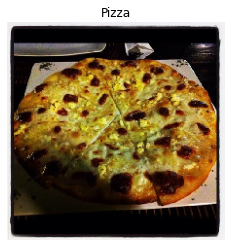

In [42]:
index = random.randint(0, 31)
plt.imshow(images[index])
plt.axis("off")
plt.title("Pizza" if labels[index] == 0.0 else "Stack")

## Create a CNN model (Start with baseline)

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 11s 208ms/step - loss: 0.7696 - accuracy: 0.6460 - val_loss: 0.4775 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 9s 189ms/step - loss: 0.4889 - accuracy: 0.7813 - val_loss: 0.3749 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 9s 186ms/step - loss: 0.4298 - accuracy: 0.8120 - val_loss: 0.4695 - val_accuracy: 0.7760
Epoch 4/10
47/47 [==============================] - 9s 187ms/step - loss: 0.3702 - accuracy: 0.8473 - val_loss: 0.3969 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 9s 188ms/step - loss: 0.2616 - accuracy: 0.9147 - val_loss: 0.4690 - val_accuracy: 0.7920
Epoch 6/10
47/47 [==============================] - 9s 186ms/step - loss: 0.1848 - accuracy: 0.9407 - val_loss: 0.4762 - val_accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 9s 187ms/step - loss: 0.1112 - accuracy: 0.9707 - val_loss: 0.4720 - val_accuracy: 0.7980
Epoch

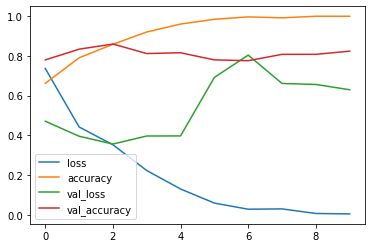

In [49]:
pd.DataFrame(history_4.history).plot()